In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
%matplotlib notebook
import pandas as pd
import new_interf
from datetime import datetime, timedelta
import scipy.optimize
import astropy.constants as c
import astropy.units as u

No module named 'rtlsdr'


In [2]:
ugradio.timing.lst
L = ugradio.nch.lat # latitude

In [14]:
sun_data = pd.read_csv('sun_data2.csv')
sun_trunc = sun_data[2100:]
sun_volts = np.array(sun_trunc['Voltages'])
sun_times = np.array(sun_trunc['Times'])
#print(datetime.utcfromtimestamp(moon_times[0]).strftime('%Y-%m-%d %H:%M:%S'), "in UTC")
def utc_to_local(unix_time):
    utc_dt = datetime.utcfromtimestamp(unix_time)
    time = utc_dt - timedelta(hours=8)
    tJ= ugradio.timing.julian_date(unix_time)
    return time.strftime('%Y-%m-%d %H:%M:%S'), tJ
t,tJ = utc_to_local(sun_times[2100])
lst = pd.read_csv('clean_sun_data.csv')
print(t, "local time", tJ, "Julian time")

#print(moon_times[0], "time of observation in bullshit unix")
sun_times -= sun_times[0]  # this is shorthand for moontime = itself minus moontime[0]
dt = sun_times[1] - sun_times[0]  # this is the time step between samples
sun_volts-= sun_volts.mean()

2022-03-30 13:48:30 local time 2459669.408681566 Julian time


In [4]:
sun_data = pd.read_csv('sun_data2.csv')
sun_trunc = sun_data[:]
sun_volts = np.array(sun_trunc['Voltages'])
sun_times = np.array(sun_trunc['Times'])



#print(datetime.utcfromtimestamp(moon_times[0]).strftime('%Y-%m-%d %H:%M:%S'), "in UTC")
def utc_to_local(unix_time):
    utc_dt = datetime.utcfromtimestamp(unix_time)
    time = utc_dt - timedelta(hours=7)
    tJ= ugradio.timing.julian_date(unix_time)
    return time.strftime('%Y-%m-%d %H:%M:%S'), tJ
t,tJ = utc_to_local(sun_times[0])
lst = pd.read_csv('clean_sun_data.csv')
print(t, "local time", tJ, "Julian time")

#print(moon_times[0], "time of observation in bullshit unix")
sun_times -= sun_times[0]  # this is shorthand for moontime = itself minus moontime[0]
dt = sun_times[1] - sun_times[0]  # this is the time step between samples
sun_volts-= sun_volts.mean()

2022-03-30 08:58:30 local time 2459669.1656264374 Julian time


In [15]:
print(sun_times[380]/3600)

0.5277777758571837


<IPython.core.display.Javascript object>


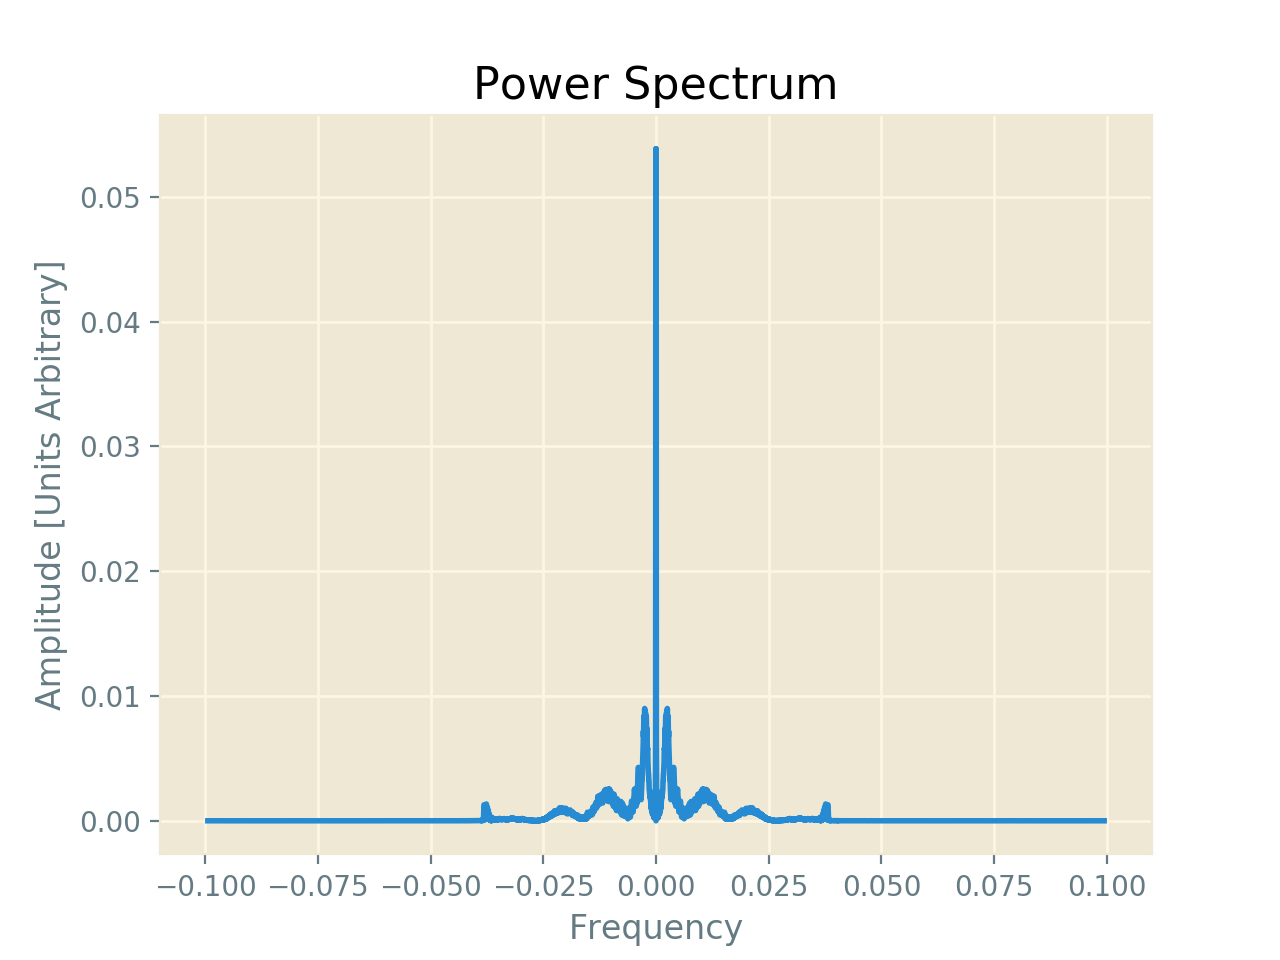

In [16]:
voltage_spectrum = np.fft.fft(sun_volts)
voltage_spectrum[0] = 0 # this is the same as subtracting the mean in the timeseries data 
power_spectrum = np.abs(voltage_spectrum)**2
frequencies = np.fft.fftfreq(len(power_spectrum), dt)

plt.figure()
plt.title("Power Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Amplitude [Units Arbitrary]")
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(power_spectrum)) # shifting the arrays to read correctly
plt.show()

<IPython.core.display.Javascript object>


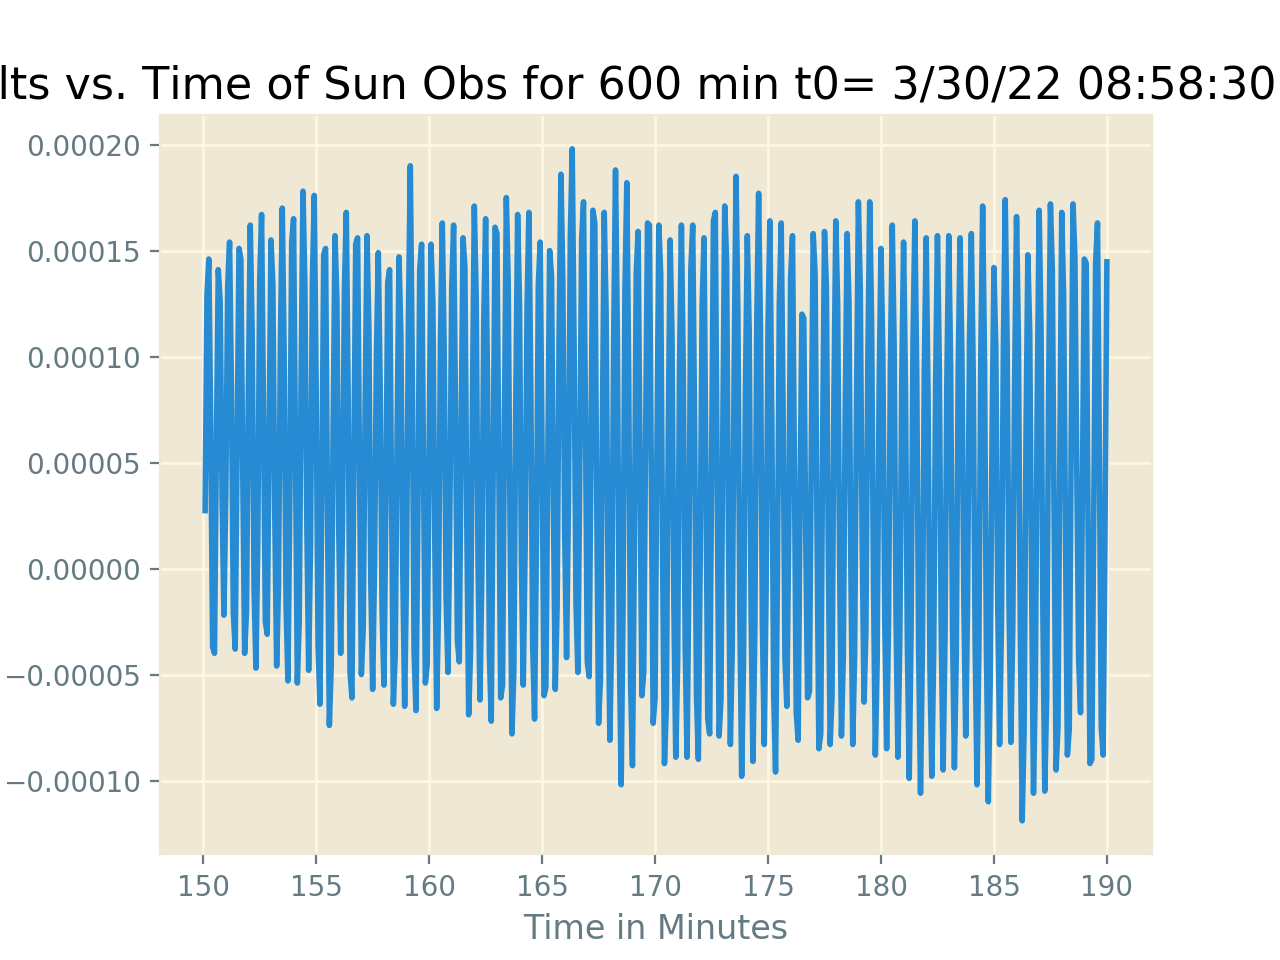

In [17]:
#cond = (sun_times/60 > 150) & (sun_times/60 < 200)
cond = (sun_times/60 > 150) & (sun_times/60 < 190)

plt.figure()
plt.xlabel("Time in Minutes")
plt.ylabel("Voltage in Volts")
plt.title("Volts vs. Time of Sun Obs for 600 min t0= 3/30/22 08:58:30 PST")
plt.plot(sun_times[cond]/60, sun_volts[cond])
plt.show()

<IPython.core.display.Javascript object>


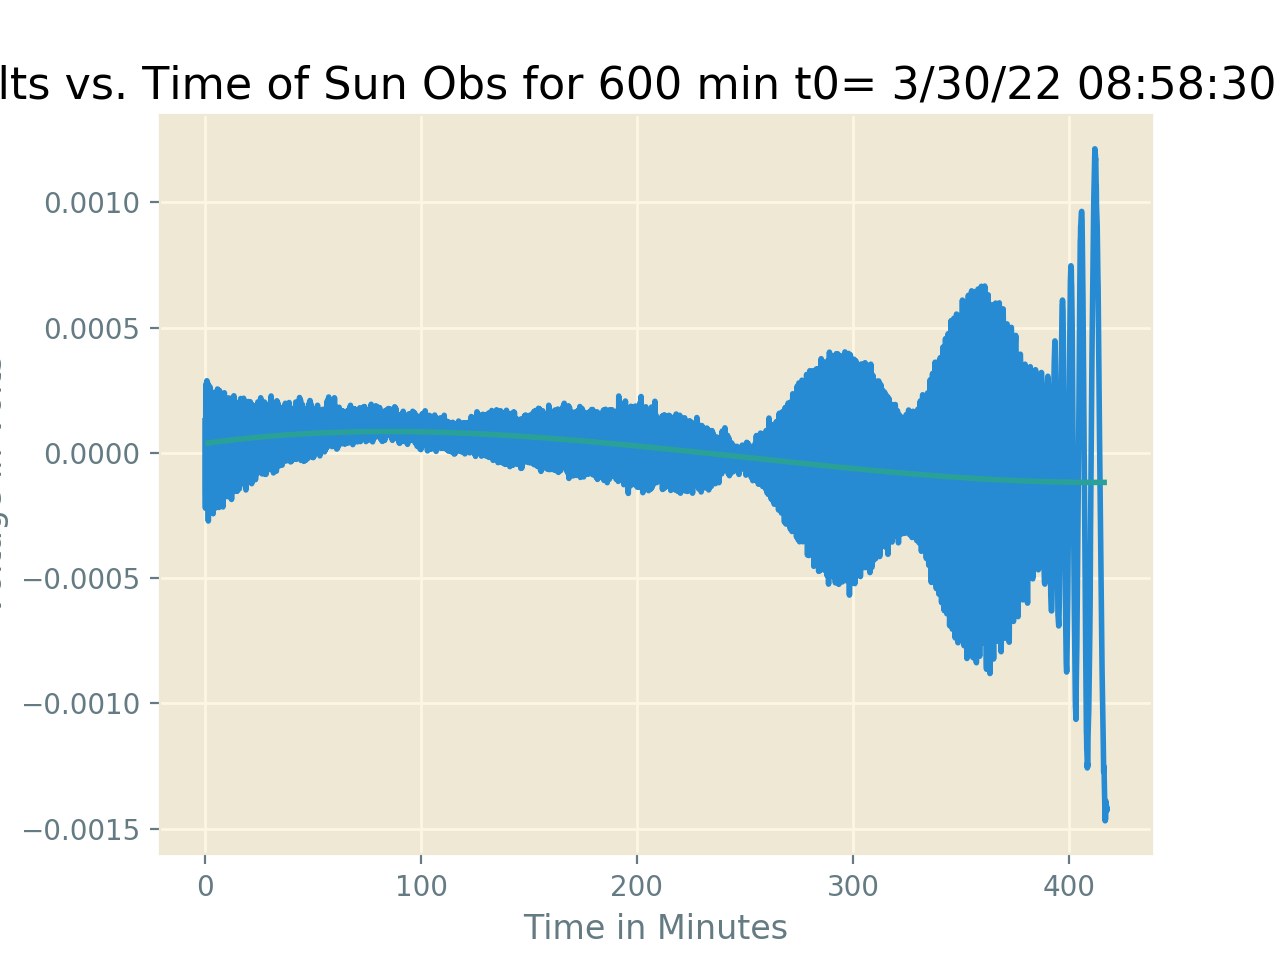

In [18]:
plt.figure()
plt.plot(sun_times/60, sun_volts)
p= np.polyfit(sun_times, sun_volts, 3)
fit = np.polyval(p, sun_times)
sun_volts-=fit
plt.xlabel("Time in Minutes")
plt.ylabel("Voltage in Volts")
#plt.xticks(1.5+ np.array([0, 30, 60, 90, 97, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480]), labels = ["9am", "9:30", "10", "10:30", "10:37", "11", "11:30", "12pm", "12:30", "1", "1:30", "2", "2:30", "3", "3:30", "4", 
                 #"4:30", "5"], rotation = "vertical")
#plt.xtickslabels(["9am", "9:30", "10", "10:30", "11", "11:30", "12pm", "12:30", "1", "1:30", "2", "2:30", "3", "3:30", "4", 
 #                "4:30", "5"])
plt.title("Volts vs. Time of Sun Obs for 600 min t0= 3/30/22 08:58:30 PST")
plt.plot(sun_times/60, fit)
plt.show()

In [19]:
sun_coord = pd.read_csv("sun_coords_times.csv").drop('Unnamed: 0', axis = 1)
sun_coord_trunc= sun_coord[2100:]

RA = sun_coord_trunc.RA<<u.rad
Dec = sun_coord_trunc.DEC<<u.rad
LST = sun_coord_trunc.LST<<u.rad


#RA_deg, dec= ugradio.coord.sunpos() # wants julian date and it will return the RA and Dec
#print(RA_deg, "RA in degrees")
#arc_dec= 10.6/60 #converting arc min to degrees 
#arc_dec
#dec = -16 - arc_dec
#print(dec, "Dec in degrees")

#precess_ra, precess_dec = ugradio.coord.precess(RA_deg, dec)
#print("precess_ra is", precess_ra, "precess_dec is", precess_dec )
#RA = np.radians(precess_ra)
#Dec = np.radians(precess_dec)
#print("RA is", RA, "Dec", Dec )

In [20]:
sun_coord

,LST,RA,DEC
0,5.330018,0.154281,0.066508
1,5.330380,0.154282,0.066509
2,5.330745,0.154283,0.066509
3,5.331109,0.154284,0.066509
4,5.331474,0.154285,0.066510
...,...,...,...
7108,1.638448,0.160822,0.069295
7109,1.638813,0.160822,0.069296
7110,1.639177,0.160823,0.069296
7111,1.639542,0.160824,0.069297


In [21]:
# guessing values for nu tau g to fit for the fringe amplitude

#guesses in meters
Bew = 20*u.m
Bns = 0*u.m
L = ugradio.nch.lat # latitude
wl = (c.c/(10.5*u.GHz)).to(u.m)  # wavelength in meters
# ntg = nu tao g
hs = LST - RA
ntg = ((Bew / wl *np.cos(Dec)) * np.sin(hs) + (Bns / wl * np.sin(L)*np.cos(Dec))*np.cos(hs))
ntg_trunc = ntg[cond]
print(ntg_trunc.min(), ntg_trunc.max())

# now this needs to go into eq 12 (f is a function of A and B)

214.0506216067539 326.1161955318005


<IPython.core.display.Javascript object>


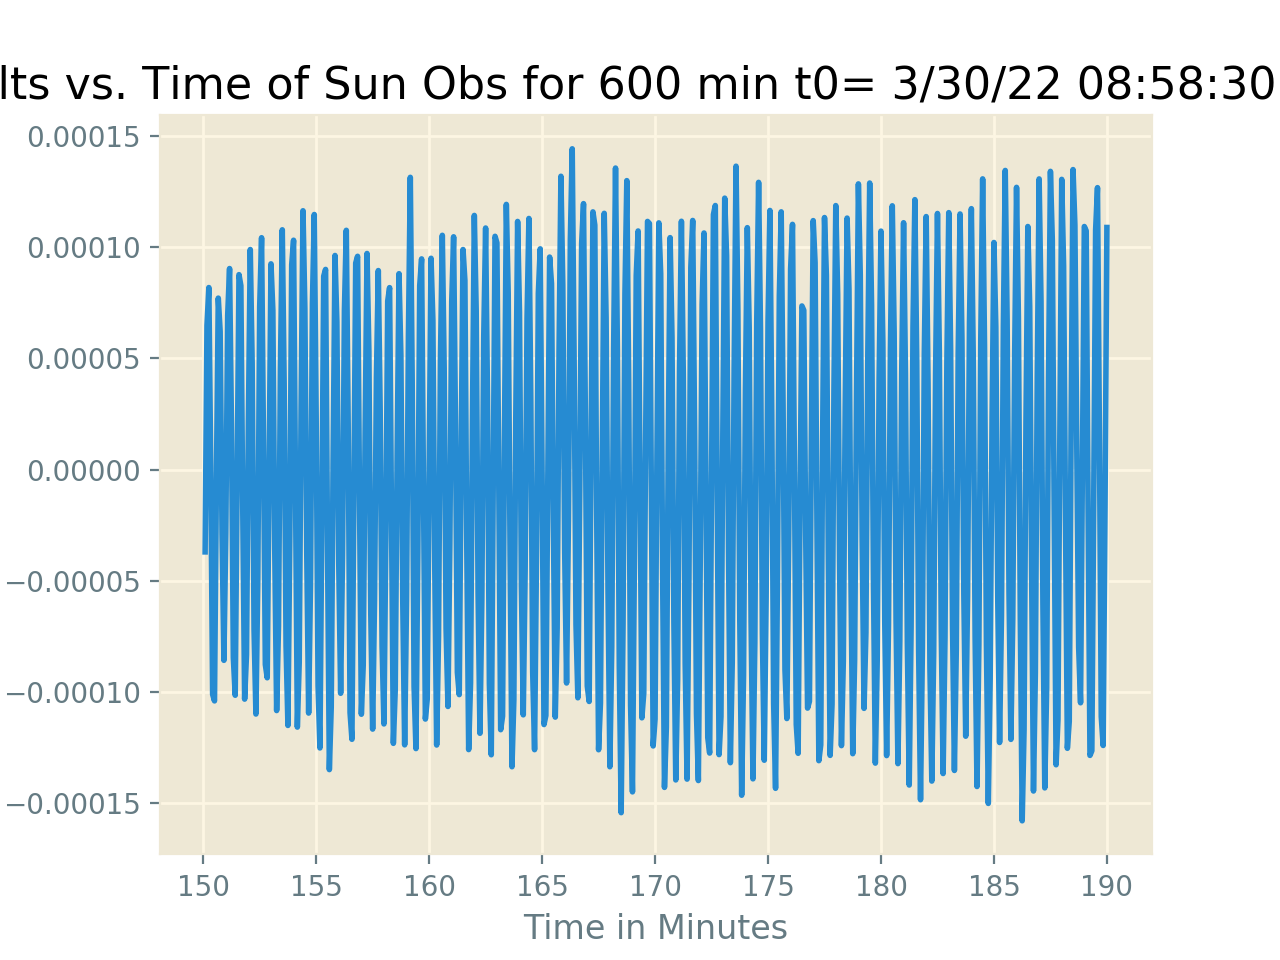

In [22]:
plt.figure()
plt.xlabel("Time in Minutes")
plt.ylabel("Voltage in Volts")
plt.title("Volts vs. Time of Sun Obs for 600 min t0= 3/30/22 08:58:30 PST")
plt.plot(sun_times[cond]/60, sun_volts[cond])
plt.show()

In [23]:
F = sun_volts[cond]
def model(n,A,B):
    return A*np.cos(2*np.pi*u.rad*n) + B*np.sin(2*np.pi*u.rad*n) 
    
def chisq(n,A,B):
    stuff = model(n,A,B)
    return np.sum((stuff-F)**2)

popt, pcov = scipy.optimize.curve_fit(model, ntg_trunc, F)
A, B = popt
print(A, B, pcov)

8.994705425421765e-07 -4.951626647802306e-07 [[ 3.22628274e-11 -5.23201487e-14]
 [-5.23201487e-14  3.23355279e-11]]


In [24]:
ntg_smooth = np.linspace(ntg_trunc.min(), ntg_trunc.max(), len(ntg_trunc)*5)

<IPython.core.display.Javascript object>


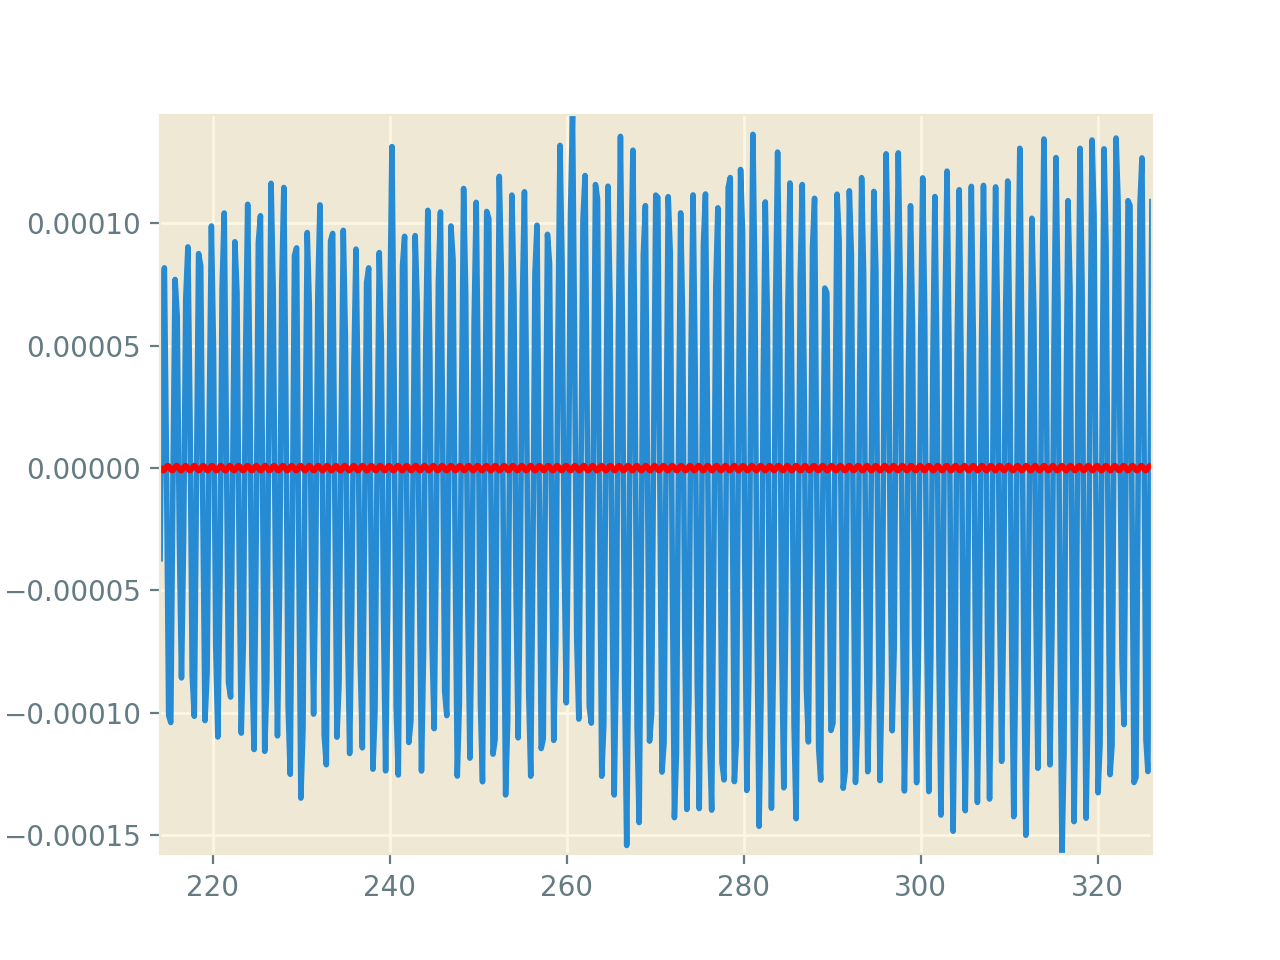

In [25]:
plt.figure()
plt.plot(ntg_trunc, F)
plt.plot(ntg_smooth, model(ntg_smooth, A, B), color='r')
plt.xlim(ntg_trunc.min()-0.01, ntg_trunc.max()+0.01)
plt.ylim(F.min(), F.max())
plt.show()

In [26]:
#guesses in meters
Bew_array = np.linspace(13,17,50)*u.m
Bns_array = np.linspace(1.5,5,50)*u.m
chisq_array = np.empty((50,50))
i = 0
j = 0

for Bew in Bew_array:
    for Bns in Bns_array:
        ntg = (Bew / wl *np.cos(Dec)) * np.sin(hs) + (Bns / wl * np.sin(L)*np.cos(Dec))*np.cos(hs)
        ntg_trunc = ntg[cond]

        popt, pcov = scipy.optimize.curve_fit(model,ntg_trunc,F)
        A,B=popt
        #print(i, j)
        chisq_array[i,j] = chisq(ntg_trunc,A,B)
        j+=1
    i+=1
    j=0

In [27]:
print(A,B)

5.759604509753082e-08 -5.667062944145151e-08


<IPython.core.display.Javascript object>


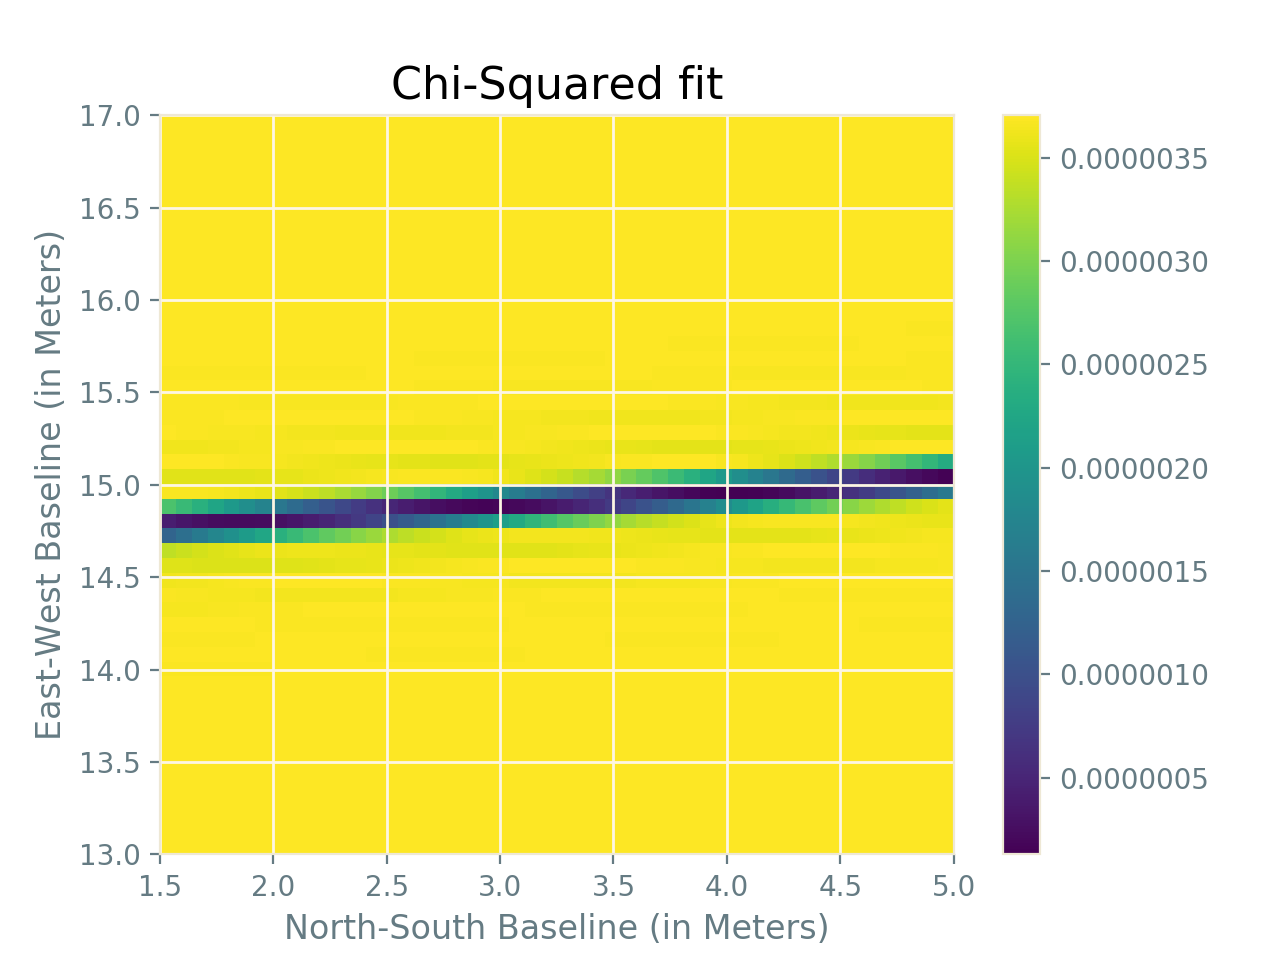

In [28]:
plt.figure()
plt.title("Chi-Squared fit")
plt.xlabel("North-South Baseline (in Meters)")
plt.ylabel("East-West Baseline (in Meters)")
plt.imshow(chisq_array,extent = [Bns_array.value.min(),Bns_array.value.max(),Bew_array.value.min(),Bew_array.value.max()], 
           aspect='auto', origin='lower')
plt.colorbar()
plt.show()
plt.savefig("Chi_Sqaured")

In [29]:
np.argmin(chisq_array)

1236

In [18]:
chisq_array.shape

(50, 50)

In [40]:
np.unravel_index(1236,(50,50))

(24, 36)

In [41]:
chisq_array[21,0]

1.2960823661346913e-07

In [42]:
Bew_array[24],Bns_array[36]

(<Quantity 14.95918367 m>, <Quantity 4.07142857 m>)

In [22]:
scipy.special.j1(sun_volts)

array([ 5.05882759e-05, -8.94618322e-05, -1.29511881e-04, ...,
       -6.51538694e-04, -6.47040860e-04, -6.57543057e-04])

In [23]:
hs = np.where(hs<0,hs + 2*np.pi*u.rad,hs)

In [24]:
def bessel_model(ha,theta,A):
    u = Bew_array[21]*np.cos(Dec[0])*np.cos(ha)/wl
    x = 2*np.pi*theta*u
    return np.abs(A*scipy.special.j1(x)/x)

In [25]:
np.min(Dec)

-0.4018077523298446

In [26]:
par, cov = scipy.optimize.curve_fit(bessel_model,hs,np.abs(sun_volts),p0=[0.25*np.pi/180,.0005])

In [27]:
theta, A = par
bessel_fit = bessel_model(hs,theta,A)

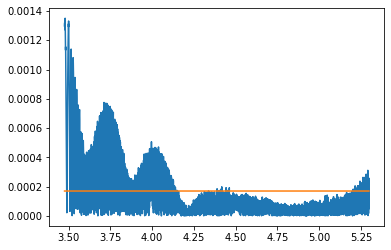

In [32]:
plt.figure()
plt.plot(hs, np.abs(sun_volts))
plt.plot(hs, bessel_fit)
plt.show()

In [29]:
#attempt at fourier filtering below but it didn't go well :))))))))))

In [38]:

def freq(arr,dt):
    return (np.fft.fftfreq(len(arr),dt))

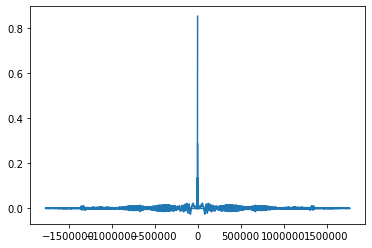

In [39]:
fft = np.fft.fft(np.abs(sun_volts))
freqs = freq(sun_volts, np.mean(np.diff(sun_volts)))
plt.plot(freqs,fft)
plt.show()

In [49]:
fft[0] = 0
cond = np.abs(freqs) > 50000
fft[cond] = 0


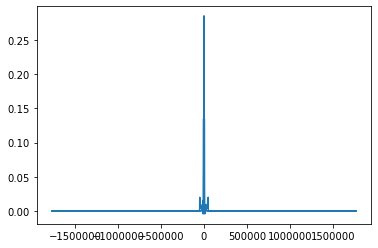

In [50]:

plt.plot(freqs,fft)
plt.show()

In [51]:
filtered_signal = np.fft.ifft(fft)

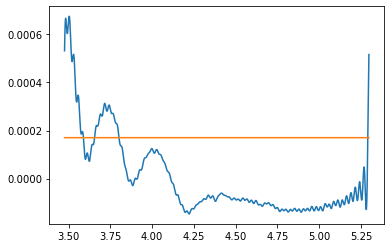

In [52]:
plt.figure()
plt.plot(hs, filtered_signal)
plt.plot(hs, bessel_fit)
plt.show()

In [58]:
hs[0]

<Quantity 5.29749308 rad>

In [59]:
cond2 = hs > 3.5*u.rad 
cond3 = hs < 4.5*u.rad
cond4 = cond2*cond3
filtered_signal_trunc = filtered_signal[cond4]
hs_trunc = hs[cond4]


In [91]:
def bessel_model(ha,theta,A):
    u = Bew_array[21]*np.cos(Dec[0])*np.cos(ha)/wl
    x = 2*np.pi*theta*u
    return np.abs(A*scipy.special.j1(x)/x)
par, cov = scipy.optimize.curve_fit(bessel_model,hs_trunc,filtered_signal_trunc,p0=[.25*np.pi/180,.0001])
theta, A = par
bessel_fit = bessel_model(hs_trunc,theta,A)

In [92]:
hs[0]

<Quantity 5.29749308 rad>

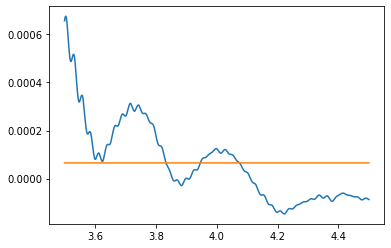

In [93]:
plt.figure()
plt.plot(hs_trunc, filtered_signal_trunc)
plt.plot(hs_trunc, bessel_fit)
plt.show()